In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression
import random

In [36]:
path_to_file = "2016-School-Explorer.csv"
df = pd.read_csv(r"2016-School-Explorer.csv")
df

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),...,Grade 8 Math - All Students Tested,Grade 8 Math 4s - All Students,Grade 8 Math 4s - American Indian or Alaska Native,Grade 8 Math 4s - Black or African American,Grade 8 Math 4s - Hispanic or Latino,Grade 8 Math 4s - Asian or Pacific Islander,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged
0,NaN,NaN,NaN,P.S. 015 ROBERTO CLEMENTE,310100010015,01M015,1,40.721834,-73.978766,"333 E 4TH ST NEW YORK, NY 10009",...,0,0,0,0,0,0,0,0,0,0
1,NaN,NaN,NaN,P.S. 019 ASHER LEVY,310100010019,01M019,1,40.729892,-73.984231,"185 1ST AVE NEW YORK, NY 10003",...,0,0,0,0,0,0,0,0,0,0
2,NaN,NaN,NaN,P.S. 020 ANNA SILVER,310100010020,01M020,1,40.721274,-73.986315,"166 ESSEX ST NEW YORK, NY 10002",...,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,NaN,P.S. 034 FRANKLIN D. ROOSEVELT,310100010034,01M034,1,40.726147,-73.975043,"730 E 12TH ST NEW YORK, NY 10009",...,48,1,0,0,0,0,0,0,0,0
4,NaN,NaN,NaN,THE STAR ACADEMY - P.S.63,310100010063,01M063,1,40.724404,-73.986360,"121 E 3RD ST NEW YORK, NY 10009",...,0,0,0,0,0,0,0,0,0,0
5,NaN,NaN,NaN,P.S. 064 ROBERT SIMON,310100010064,01M064,1,40.723747,-73.981602,"600 E 6TH ST NEW YORK, NY 10009",...,0,0,0,0,0,0,0,0,0,0
6,NaN,NaN,NaN,P.S. 110 FLORENCE NIGHTINGALE,310100010110,01M110,1,40.715293,-73.979927,"285 DELANCEY ST NEW YORK, NY 10002",...,0,0,0,0,0,0,0,0,0,0
7,NaN,NaN,NaN,P.S. 134 HENRIETTA SZOLD,310100010134,01M134,1,40.714301,-73.982966,"293 E BROADWAY NEW YORK, NY 10002",...,0,0,0,0,0,0,0,0,0,0
8,NaN,NaN,NaN,P.S. 140 NATHAN STRAUS,310100010140,01M140,1,40.719128,-73.983283,"123 RIDGE ST NEW YORK, NY 10002",...,61,2,0,0,1,0,0,0,0,1
9,NaN,NaN,NaN,P.S. 142 AMALIA CASTRO,310100010142,01M142,1,40.718230,-73.984082,"100 ATTORNEY ST NEW YORK, NY 10002",...,0,0,0,0,0,0,0,0,0,0


In [37]:
#replace the special characters in column names
df.columns = df.columns.str.replace('?', '')
df.columns = df.columns.str.replace(' ', '')
df.columns = df.columns.str.replace('-', '')
df.columns = df.columns.str.replace('(', '')
df.columns = df.columns.str.replace(')', '')


In [38]:
for i in df.AddressFull:
    if type(i) != str:
        print(i, end = "\n")
#therefore no cleaning is required for AddressFull

In [39]:
for i in df.SEDCode:
    if type(i) != int:
        print(i, end = "\n")
#no cleaning is required for SEDCode

In [40]:
for i in df.LocationCode:
    if type(i) != str:
        print(i, end = "\n")
#no cleaning is required for LocationCode

In [41]:
for i in df.District:
    if type(i) != int:
        print(i, endl = "\n")
#no cleaning is required for District

In [42]:
#replace $ and , in School income Estimate
df.SchoolIncomeEstimate = df.SchoolIncomeEstimate.str.replace('$','')
df.SchoolIncomeEstimate = df.SchoolIncomeEstimate.str.replace(',','')


In [43]:
#convert School Income Estimate values to float
df.SchoolIncomeEstimate = df.SchoolIncomeEstimate.astype('float')
#df.SchoolIncomeEstimate

In [44]:
#funciton to remove % from many columns
def remove_perc(x):
    df[x] = df[x].str.replace('%', '').astype('float')

In [45]:
remove_perc("PercentELL")
remove_perc("PercentAsian")
remove_perc("PercentBlack")
remove_perc("PercentHispanic")
remove_perc("PercentBlack/Hispanic")
remove_perc("PercentWhite")
remove_perc("StudentAttendanceRate")
remove_perc("PercentofStudentsChronicallyAbsent")
remove_perc("RigorousInstruction%")
remove_perc("CollaborativeTeachers%")
remove_perc("SupportiveEnvironment%")
remove_perc("EffectiveSchoolLeadership%")
remove_perc("StrongFamilyCommunityTies%")
remove_perc("Trust%")

In [46]:
#fill missing values
df["SchoolIncomeEstimate"] = df["SchoolIncomeEstimate"].fillna(np.mean(df["SchoolIncomeEstimate"]))
df["EconomicNeedIndex"] = df["EconomicNeedIndex"].fillna(np.mean(df["EconomicNeedIndex"]))
df["StudentAttendanceRate"] = df["StudentAttendanceRate"].fillna(np.mean(df["StudentAttendanceRate"]))
df["PercentofStudentsChronicallyAbsent"] = df["PercentofStudentsChronicallyAbsent"].fillna(np.mean(df["PercentofStudentsChronicallyAbsent"]))
df["RigorousInstruction%"] = df["RigorousInstruction%"].fillna(np.mean(df["RigorousInstruction%"]))
df["CollaborativeTeachers%"] = df["CollaborativeTeachers%"].fillna(np.mean(df["CollaborativeTeachers%"]))
df["AverageELAProficiency"] = df["AverageELAProficiency"].fillna(np.mean(df["AverageELAProficiency"]))
df["AverageMathProficiency"] = df["AverageMathProficiency"].fillna(np.mean(df["AverageMathProficiency"]))
df["PercentAsian"] = df["PercentAsian"].fillna(np.mean(df["PercentAsian"]))
df["PercentBlack"] = df["PercentBlack"].fillna(np.mean(df["PercentBlack"]))
df["PercentHispanic"] = df["PercentHispanic"].fillna(np.mean(df["PercentHispanic"]))
df["PercentWhite"] = df["PercentWhite"].fillna(np.mean(df["PercentWhite"]))
df["RigorousInstruction%"] = df["RigorousInstruction%"].fillna(np.mean(df["RigorousInstruction%"]))
df["CollaborativeTeachers%"] = df["CollaborativeTeachers%"].fillna(np.mean(df["CollaborativeTeachers%"]))
df["SupportiveEnvironment%"] = df["SupportiveEnvironment%"].fillna(np.mean(df["SupportiveEnvironment%"]))
df["EffectiveSchoolLeadership%"] = df["EffectiveSchoolLeadership%"].fillna(np.mean(df["EffectiveSchoolLeadership%"]))
df["StrongFamilyCommunityTies%"] = df["StrongFamilyCommunityTies%"].fillna(np.mean(df["StrongFamilyCommunityTies%"]))
df["Trust%"] = df["Trust%"].fillna(np.mean(df["Trust%"]))

Correlation between Economic Index and attendance rates

C:\Users\saiea\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


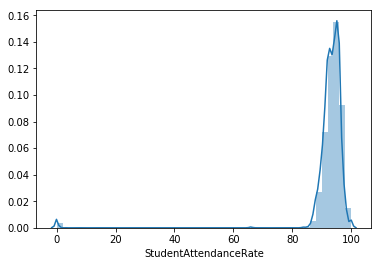

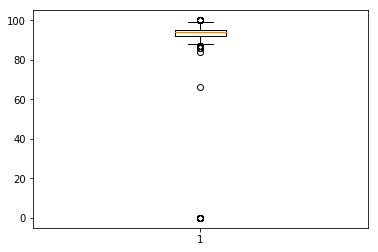

In [47]:
sns.distplot(df.StudentAttendanceRate)
plt.show()
plt.boxplot(df.StudentAttendanceRate)
plt.show()

Outliers are present in StudentAttendanceRates

In [48]:
l = sorted(list(df.StudentAttendanceRate))
n = len(l)
Q1 = df.StudentAttendanceRate[math.ceil(0.25 * (n + 1))]
Q2 = df.StudentAttendanceRate[math.ceil(0.5 * (n + 1))]
Q3 = df.StudentAttendanceRate[math.ceil(0.75 * (n + 1))]
WL = 1.5 * (Q3 - Q2)
for i in range(n):
    if df.StudentAttendanceRate[i] < (Q1 - WL) or df.StudentAttendanceRate[i] > (Q3 + WL):
        df.StudentAttendanceRate[i] = np.mean(df.StudentAttendanceRate)


C:\Users\saiea\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


C:\Users\saiea\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


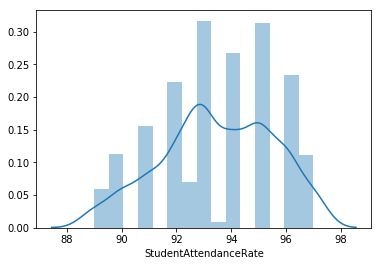

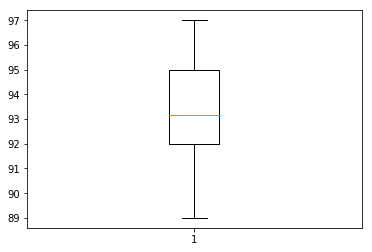

In [49]:
sns.distplot(df.StudentAttendanceRate)
plt.show()
plt.boxplot(df.StudentAttendanceRate)
plt.show()

Therefore there are no outliers in StudentAttendanceRates

C:\Users\saiea\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


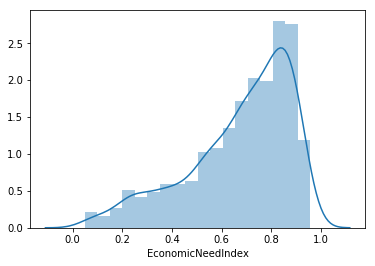

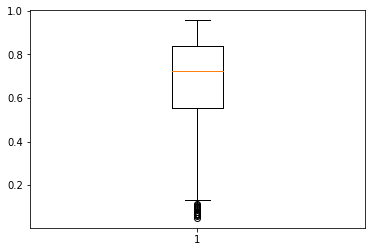

In [50]:
sns.distplot(df.EconomicNeedIndex)
plt.show()
plt.boxplot(df.EconomicNeedIndex)
plt.show()

Outliers present in EconomicNeedIndex

In [51]:
l = sorted(list(df.EconomicNeedIndex))
n = len(l)
Q1 = df.EconomicNeedIndex[math.ceil(0.25 * (n + 1))]
Q2 = df.EconomicNeedIndex[math.ceil(0.5 * (n + 1))]
Q3 = df.EconomicNeedIndex[math.ceil(0.75 * (n + 1))]
WL = 1.5 * (Q3 - Q2)
for i in range(n):
    if df.EconomicNeedIndex[i] < (Q1 - WL) or df.EconomicNeedIndex[i] > (Q3 + WL):
        df.EconomicNeedIndex[i] = np.mean(df.EconomicNeedIndex)


C:\Users\saiea\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


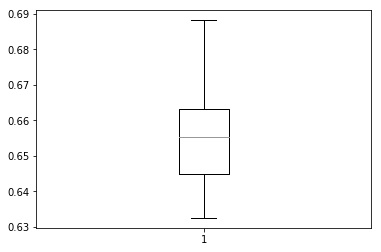

In [52]:
plt.boxplot(df.EconomicNeedIndex)
plt.show()

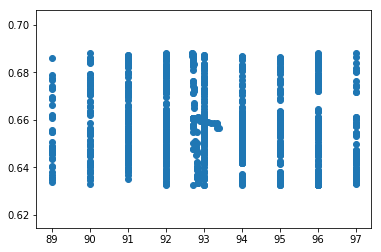

In [53]:
plt.scatter(df.StudentAttendanceRate, df.EconomicNeedIndex)

In [83]:
def removeOutliers(col):
    col = sorted(col)
    Q1 = col[math.ceil(0.25 * (n + 1))]
    Q2 = col[math.ceil(0.5 * (n + 1))]
    Q3 = col[math.ceil(0.75 * (n + 1))]
    WL = 1.5 * (Q3 - Q2)
    for i in col:
        if i < (Q1 - WL) or i > (Q3 + WL):
            col.remove(i)
    return col


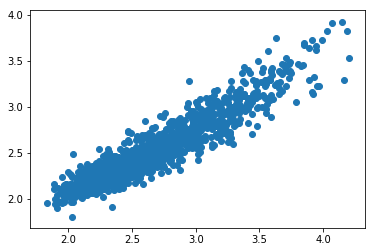

In [55]:
plt.scatter(df.AverageMathProficiency, df.AverageELAProficiency)

In [56]:
x = np.array(df.AverageMathProficiency).reshape(-1,1)
y = np.array(df.AverageELAProficiency)

In [57]:
model = LinearRegression()
model.fit(x,y)
intecept = model.intercept_
slope = model.coef_[0]
print("Intercept: ", intecept)
print("Slope: ", slope)

Intercept:  0.6036859534179095
Slope:  0.7233274000623144


Therefore, 
    AverageElaProficiency = intercept + slope * AverageMathProficiency

In [91]:
ela = list(df.AverageELAProficiency)
ela = removeOutliers(ela)


In [92]:
mathl = list(df.AverageMathProficiency)
mathl = removeOutliers(mathl)

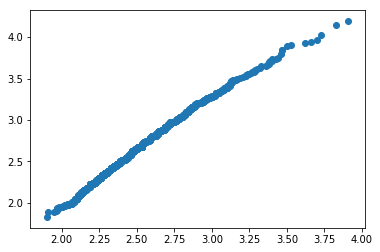

In [93]:
mini = min(len(ela), len(mathl))
if(len(ela) > mini):
    for i in range(len(ela) - mini):
        rand_ele = random.choice(ela)
        ela.remove(rand_ele)
else:
    for i in range(len(mathl) - mini):
        rand_ele = random.choice(mathl)
        mathl.remove(rand_ele)
plt.scatter(ela, mathl)

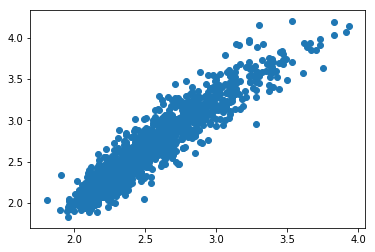

In [73]:
plt.scatter(df.AverageELAProficiency, df.AverageMathProficiency)

In [99]:
b1, b0 = np.polyfit(ela, mathl, 1)

In [100]:
b1, b0

(1.3194841352787907, -0.6697486959393854)